In [1]:
import numpy as np
import pandas as pd

# stats
from scipy import stats
# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

# """ So, Let's Discuss WHY I SUCK IN PROBABILITY?""""

####  usually, beofre solving any problem either in real life or mathematical we have data set, idea about goal and results. Using this we find result related to particular idea and then goal, but lets say  WE DON'T HAVE ANY IDEA ABOUT GOAL,RESULT

## THIS MONET IN REAL LIFE OR IN MATHEMATICAL TERM CONFUSES PEOPLE.
# OTHER THINGS IS PROBABILITY IS STUDY BEING CONTINUED SINCE MORE THAN 2000 YEARS, MORE THAN 3000 PEOPLE IN CHRONOLOGICAL ORDER BEFORE YOU.

## THEY WERE ABLE TO FIND MATHEMATICAL TERM FOR EVERY SCENARIO, LIKE ONE WERE WE KNOW GOAL BUT NOT RESULT, ONE WHERE WE DON'T KNOW BOTH.


# pdf like we seen before, it's integration on particular data set on y axis.



# Independent set examples are given below, independent set are not dependent on each other, and p(x,y) -- p(x)*p(y)


In [57]:
def dice():  
    D1 = np.random.randint(1,7,36000)
    D2 = np.random.randint(1,7,36000)

    _df1 = pd.DataFrame(D1, columns=["Dice1"])
    _df2 = pd.DataFrame(D2, columns=["Dice2"])
    Dice = pd.concat([_df1,_df2],axis=1)
    Dice.index = np.arange(1,36001)
    _df3= pd.DataFrame(Dice.duplicated(subset=None,keep=False),columns=["Bool"])
    _df3
    Dice = pd.concat([Dice,_df3],axis=1)

    Dice= Dice[Dice["Bool"]==True]
    f = Dice.groupby(['Dice1','Dice2','Bool']).size()
    g = pd.DataFrame(f)
    return Dice,g
    
d,g = dice()


In [58]:
d

,Dice1,Dice2,Bool
1,1,1,True
2,3,1,True
3,2,2,True
4,1,5,True
5,5,2,True
6,1,6,True
7,2,6,True
8,4,1,True
9,1,3,True
10,5,6,True


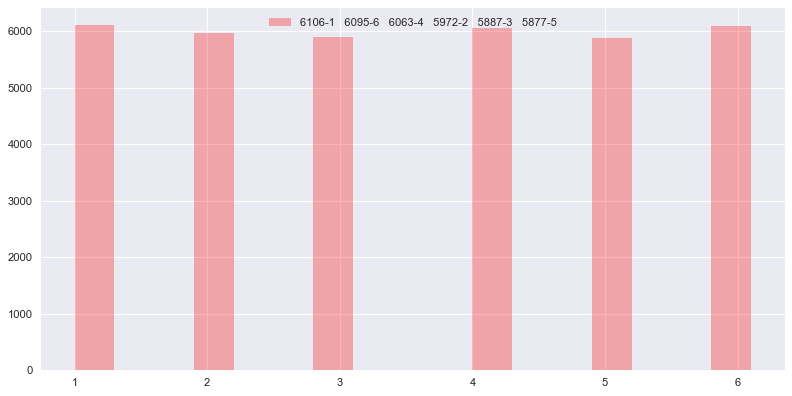

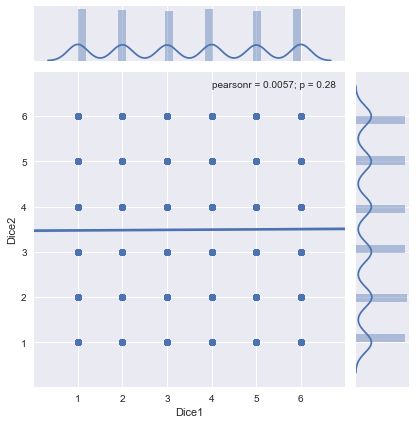

In [97]:
Dice,g = dice()
a = Dice["Dice1"]
b = Dice["Dice2"]
binwidth = 0.3

# sns.jointplot(a,b,kind="hex")     



r,c = 4,6
plt.figure(figsize=(12,6),dpi=80) #changing dpi we can zoom it, and change frame size using figsize 
mpl.gridspec.GridSpec(r,c)
plt.subplot2grid((r,c),(0,0),colspan=6,rowspan=4)
kk = a.value_counts()
x = "{0}-{6}   {1}-{7}   {2}-{8}   {3}-{9}   {4}-{10}   {5}-{11}".format(kk.values[0],kk.values[1],kk.values[2],kk.values[3],kk.values[4],kk.values[5],kk.index[0],kk.index[1],kk.index[2],kk.index[3],kk.index[4],kk.index[5])
# plt.axis([1,6,0,1])
plt.hist(a,bins=np.arange(min(a),max(a)+binwidth, binwidth), color="red", alpha=0.3, label = x)
plt.legend(loc='upper center')
# plt.subplot2grid((r,c),(0,3),colspan=3,rowspan=2)
# plt.hist(b,normed=True,bins=np.arange(min(b),max(b)+binwidth, binwidth), color="blue", alpha=0.3)


sns.jointplot(a,b,kind="reg")

In [84]:
def find_pdf(object_):
    n = len(object_)
    with open('pdf.csv',mode='w') as lol:
        for f in object_.value_counts():
            pdf = f/n
            print("{} {} ".format(pdf,f),file=lol)
    x =object_.value_counts()
    n = pd.DataFrame({"Values":x.index,"Frequency":x.values})
    m = pd.read_csv("pdf.csv", header=None, sep=" ")
    m.columns = ["PDF", "Frequency","Drop"]
    m = m.drop('Drop',axis=1)
    l = pd.merge(m,n,on="Frequency")
    return l
l = find_pdf(a)
l

TypeError: object of type 'float' has no len()

k = Dice.sample(frac=0.003)
binwidth = 0.5
plt.hist(k['Dice1'],bins=np.arange(min(k['Dice1']),max(k['Dice1'])+binwidth, binwidth), color="red", alpha=0.5)

# '''
#    defaultdict(list) creates dicitionary on basis of common values and different keys

# '''

In [41]:
d = {(i,j):i+j for i in range(1,7) for j in range(1,7)}

from collections import defaultdict
dinv = defaultdict(list)
for i,j in d.items():
    dinv[j].append(i)

dinv

##########################
'''
    defaultdict(list) creates dicitionary on basis of common values and different keys

'''
dinv[7]

j = len(dinv[7])
x = { i : len(j)/36 for i,j in dinv.items()}
x

{2: 0.027777777777777776,
 3: 0.05555555555555555,
 4: 0.08333333333333333,
 5: 0.1111111111111111,
 6: 0.1388888888888889,
 7: 0.16666666666666666,
 8: 0.1388888888888889,
 9: 0.1111111111111111,
 10: 0.08333333333333333,
 11: 0.05555555555555555,
 12: 0.027777777777777776}

In [53]:
h = 1
for i in range(1,7):
    for j in range(1,7):
        h = h + 1
        d[h] = {(i,j):(i+j)}
d


TypeError: 'float' object does not support item assignment

In [44]:
dinv

defaultdict(list,
            {2: [(1, 1)],
             3: [(1, 2), (2, 1)],
             4: [(1, 3), (2, 2), (3, 1)],
             5: [(1, 4), (2, 3), (3, 2), (4, 1)],
             6: [(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)],
             7: [(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)],
             8: [(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)],
             9: [(3, 6), (4, 5), (5, 4), (6, 3)],
             10: [(4, 6), (5, 5), (6, 4)],
             11: [(5, 6), (6, 5)],
             12: [(6, 6)]})

In [ ]:
_df1 = pd.DataFrame(index=[(i,j) for i in range(1,7) for j in range(1,7)], columns=['sm','d1','d2','pdf1','pdf2','p'])
_df1['sm'] =list(map(sum,_df1.index))

_df1['d1'] = [k[0] for k in _df1.index]
_df1['d2'] = [k[1] for k in _df1.index]
_df1['pdf1'] = []


# continuous random variable


X is random variable with R-[0,1]
then
X[R]=[0,1]
P[X[R]]=[0,1]
BUT IF WE WANT PROBABILITY TO BE [1/2]
THEN,X[R] = [0,1/2]

##### P[X[R]] = INTEGRATION(LIM((0,1/2)(dx))

LET 'S SAY, Y=2X
P[Y[R]] = [0,1/2] ?




# well It didn't went well, so switching to udemy videos... cross finger